In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # visualization
import matplotlib.pyplot as plt

%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#from subprocess import check_output
#print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

In [2]:
# load iris database
data = pd.read_csv('smoke_detection_iot.csv')
data.sample(n=5)

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
18187,18187,1654751518,19.007,49.71,1103,400,12918,19457,938.690,1.43,1.49,9.85,1.536,0.035,18187,1
28641,28641,1654764990,20.330,56.43,354,400,13095,19866,939.678,1.40,1.46,9.65,1.504,0.034,3647,1
807,807,1654734138,26.817,54.88,0,400,12978,19924,939.789,0.17,0.17,1.14,0.178,0.004,807,0
60545,60545,1655127967,12.033,42.34,0,400,13350,21193,937.450,1.68,1.75,11.57,1.803,0.041,3659,0
8472,8472,1654741803,-4.731,55.83,339,400,13093,19917,939.323,0.22,0.23,1.52,0.237,0.005,8472,1


In [3]:
data.columns

Index(['Unnamed: 0', 'UTC', 'Temperature[C]', 'Humidity[%]', 'TVOC[ppb]',
       'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5',
       'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'Fire Alarm'],
      dtype='object')

In [4]:
data = data.drop('Unnamed: 0', axis = 1)
data = data.drop('UTC', axis = 1)

In [5]:
data = data.rename(columns={'Temperature[C]': 'temp', 'Humidity[%]': 'humidity', 'TVOC[ppb]': 'tvoc', 'eCO2[ppm]': 'eco2', 'Raw H2':'raw_h2', 'Raw Ethanol': 'raw_ethnol', 'Pressure[hPa]': 'pressure', 'Fire Alarm': 'fire_alarm' })

In [6]:
data.columns

Index(['temp', 'humidity', 'tvoc', 'eco2', 'raw_h2', 'raw_ethnol', 'pressure',
       'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'fire_alarm'],
      dtype='object')

In [7]:
data.head()

,temp,humidity,tvoc,eco2,raw_h2,raw_ethnol,pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire_alarm
0,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [8]:
print(data.fire_alarm.unique())

[0 1]


In [9]:
data.describe()

,temp,humidity,tvoc,eco2,raw_h2,raw_ethnol,pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire_alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [10]:
data.columns

Index(['temp', 'humidity', 'tvoc', 'eco2', 'raw_h2', 'raw_ethnol', 'pressure',
       'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT', 'fire_alarm'],
      dtype='object')

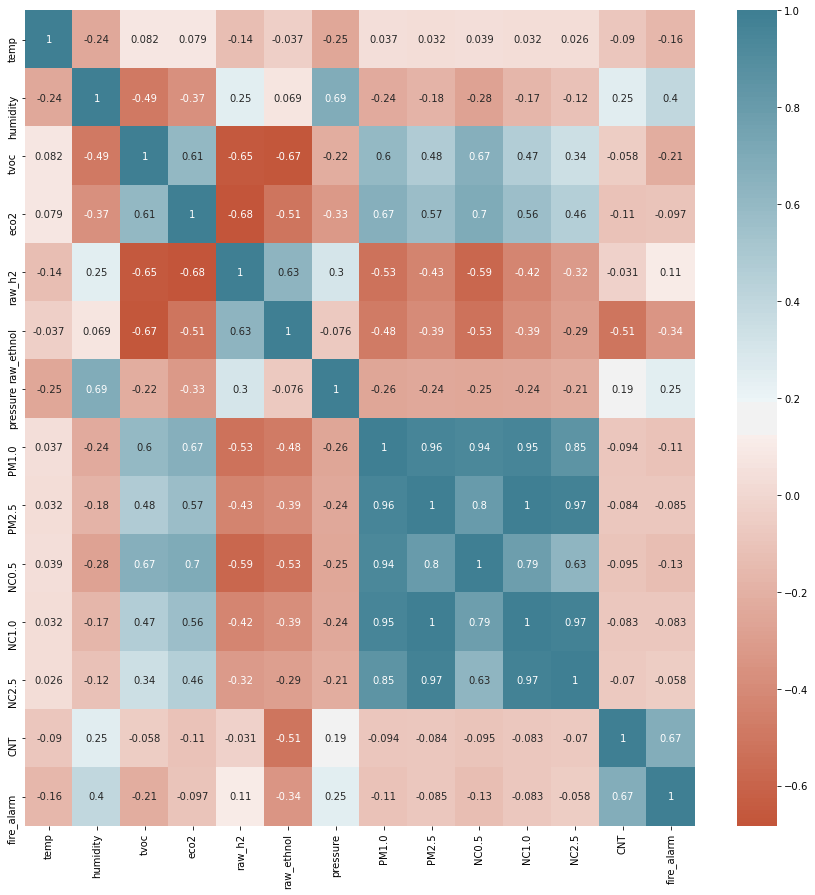

In [11]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True, cmap = sns.diverging_palette(20, 220, n=200))

In [12]:
# # simple visualization to show how the inputs compare against each other
# g = sns.PairGrid( data=data[data["fire_alarm"]<60], vars=('temp', 'humidity', 'tvoc', 'eco2', 'raw_h2', 'raw_ethnol', 'pressure',
#         'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT'), hue='fire_alarm' )
# g.map_lower(plt.scatter, alpha = 0.6)
# g.map_diag(plt.hist, alpha = 0.7)
# g.map_upper(sns.kdeplot, shade =True)

In [13]:
df_norm = data[['temp', 'humidity', 'tvoc', 'eco2', 'raw_h2', 'raw_ethnol', 'pressure',
       'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5', 'CNT']].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df_norm.sample(n=5)

,temp,humidity,tvoc,eco2,raw_h2,raw_ethnol,pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT
56182,0.894679,0.217344,1.000000,0.276577,0.119298,0.120302,0.661783,0.747505,0.421881,0.871076,0.406611,0.268404,0.201656
60644,0.421735,0.435774,0.000000,0.000000,0.886443,0.981946,0.725275,0.000141,0.000046,0.000227,0.000042,0.000002,0.150362
59176,0.230888,0.572758,0.002300,0.000000,0.676874,0.863778,0.720835,0.000116,0.000038,0.000186,0.000034,0.000001,0.091626
57738,0.303588,0.556624,0.001700,0.000252,0.673684,0.875923,0.747031,0.000129,0.000042,0.000207,0.000038,0.000001,0.034090
29236,0.515865,0.638070,0.002033,0.000000,0.812759,0.783194,0.977578,0.000144,0.000047,0.000231,0.000043,0.000002,0.169728


In [14]:
target = data[['fire_alarm']]
df = pd.concat([df_norm, target], axis=1)
df.sample(n=5)

,temp,humidity,tvoc,eco2,raw_h2,raw_ethnol,pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire_alarm
47113,0.571272,0.643345,0.022500,0.000101,0.731100,0.669129,0.873904,0.000113,0.000037,0.000181,0.000033,0.000001,0.885008,1
14308,0.466256,0.563140,0.018900,0.001292,0.698246,0.678484,0.893884,0.000151,0.000049,0.000242,0.000045,0.000002,0.572480,1
41989,0.596046,0.579584,0.018383,0.000000,0.711962,0.678648,0.880120,0.000114,0.000038,0.000184,0.000034,0.000001,0.679990,1
54513,0.585062,0.590909,0.003617,0.000789,0.666986,0.850977,0.731269,0.000119,0.000039,0.000192,0.000035,0.000001,0.134878,0
47151,0.596046,0.581911,0.022533,0.000000,0.732695,0.668800,0.874459,0.000152,0.000050,0.000244,0.000045,0.000002,0.886528,1


In [15]:
df.describe()

,temp,humidity,tvoc,eco2,raw_h2,raw_ethnol,pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire_alarm
count,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,0.463515,0.586402,0.032368,0.004531,0.725504,0.728255,0.863098,0.007018,0.004060,0.007994,0.003922,0.002666,0.420573,0.714626
std,0.175245,0.137533,0.130193,0.031978,0.086910,0.100035,0.147779,0.064361,0.043500,0.069381,0.042661,0.036081,0.304000,0.451596
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.402786,0.570742,0.002167,0.000000,0.689633,0.675858,0.871129,0.000089,0.000029,0.000143,0.000027,0.000001,0.145051,0.000000
50%,0.514279,0.611387,0.016350,0.000000,0.719617,0.686690,0.884005,0.000126,0.000041,0.000202,0.000037,0.000001,0.373545,1.000000
75%,0.578710,0.659324,0.019817,0.000638,0.778628,0.781388,0.950827,0.000146,0.000048,0.000235,0.000043,0.000002,0.686782,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
train_test_per = 90/100.0
df['train'] = np.random.rand(len(df_norm)) < train_test_per
df.sample(n=5)

,temp,humidity,tvoc,eco2,raw_h2,raw_ethnol,pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire_alarm,train
4754,0.182353,0.592771,0.000850,0.000000,0.822967,0.796160,0.980020,0.000165,0.000054,0.000264,0.000049,0.000002,0.190213,1,True
44087,0.595802,0.583773,0.019767,0.000034,0.718979,0.675693,0.872017,0.000117,0.000039,0.000188,0.000035,0.000001,0.763934,1,True
39811,0.567732,0.661806,0.018900,0.000856,0.700478,0.678484,0.886891,0.000119,0.000039,0.000190,0.000035,0.000001,0.592846,1,False
50112,0.552966,0.836798,0.006833,0.016930,0.737480,0.696865,0.041403,0.928142,0.807382,0.555116,0.801646,0.749728,0.004961,1,True
29895,0.514889,0.655445,0.000600,0.000000,0.821053,0.798129,0.978688,0.000162,0.000053,0.000260,0.000048,0.000002,0.196095,1,True


In [17]:
train = df[df.train == 1]
train = train.drop('train', axis=1).sample(frac=1)
train.sample(n=5)

,temp,humidity,tvoc,eco2,raw_h2,raw_ethnol,pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire_alarm
33203,0.514645,0.685231,0.004950,0.000000,0.781818,0.761858,0.946720,0.000015,0.000005,0.000025,0.000005,1.665199e-07,0.328452,1
35500,0.554918,0.686627,0.015100,0.004698,0.674960,0.686197,0.917527,0.000118,0.000039,0.000190,0.000035,1.365463e-06,0.420358,1
24704,0.346241,0.660410,0.022667,0.000168,0.738118,0.668800,0.882340,0.000121,0.000040,0.000194,0.000036,1.398767e-06,0.988437,1
25010,0.431535,0.622401,0.000000,0.000000,0.577990,0.667159,0.988567,0.000042,0.000055,0.000000,0.000056,6.164567e-05,0.000640,0
32162,0.507444,0.609836,0.004433,0.000000,0.780223,0.766125,0.962371,0.000033,0.000011,0.000052,0.000010,3.663438e-07,0.286800,1


In [18]:
test = df[df.train == 0]
test = test.drop('train', axis=1)
test.sample(n=5)

,temp,humidity,tvoc,eco2,raw_h2,raw_ethnol,pressure,PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,fire_alarm
43445,0.585062,0.566863,0.021667,0.000520,0.710048,0.669949,0.874570,0.000110,0.000036,0.000177,0.000033,1.265551e-06,0.738247,1
51268,0.599951,0.520012,0.001267,0.000604,0.695056,0.886263,0.746143,0.000158,0.000052,0.000254,0.000047,1.831719e-06,0.005041,0
15683,0.415231,0.568415,0.019600,0.000336,0.702711,0.674216,0.882451,0.000138,0.000045,0.000221,0.000041,1.598591e-06,0.627496,1
15503,0.416756,0.567173,0.019283,0.000403,0.702711,0.676350,0.884116,0.000108,0.000035,0.000173,0.000032,1.232247e-06,0.620294,1
27393,0.488650,0.633726,0.000567,0.000000,0.807337,0.789430,0.971362,0.000068,0.000022,0.000110,0.000020,7.992956e-07,0.095987,0


In [19]:
X = train.values[:,:13]
X[:10]

array([[8.39516720e-01, 2.88240769e-01, 1.00000000e+00, 7.13422819e-02,
        3.34928230e-01, 3.20367635e-01, 6.71661672e-01, 4.93655158e-02,
        1.61814534e-02, 7.92114379e-02, 1.46284442e-02, 5.71229927e-04,
        1.95694795e-01],
       [5.91164267e-01, 6.14799876e-01, 1.81666667e-02, 2.68456376e-04,
        7.04944179e-01, 6.79632365e-01, 8.84337884e-01, 1.37438440e-04,
        4.49020146e-05, 2.20226951e-04, 4.06821346e-05, 1.59859121e-06,
        6.12371464e-01],
       [7.29802294e-01, 4.93949736e-01, 1.07566667e-01, 0.00000000e+00,
        7.62041467e-01, 6.94567537e-01, 6.71439671e-01, 2.86039394e-05,
        9.24453241e-06, 4.55417624e-05, 8.41765759e-06, 3.33039836e-07,
        1.66686672e-01],
       [7.42006346e-01, 4.34998449e-01, 1.56383333e-01, 0.00000000e+00,
        7.05901116e-01, 6.65517807e-01, 6.69996670e-01, 4.18594235e-05,
        1.36466907e-05, 6.73367486e-05, 1.24242315e-05, 4.99559755e-07,
        1.68447165e-01],
       [1.69013913e-01, 6.48309029e-

In [20]:
targets = [[1,0,0,0,0,0],[0,1,0,0,0,0],[0,0,1,0,0,0],[0,0,0,1,0,0],[0,0,0,0,1,0],[0,0,0,0,0,1]]
y = np.array([targets[int(x)] for x in train.values[:,13:14]])
y[:5]

array([[1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0]])

In [21]:
num_inputs = len(X[0])
hidden_layer_neurons = 12
np.random.seed(4)
w1 = 2*np.random.random((num_inputs, hidden_layer_neurons)) - 1
w1

array([[ 0.93405968,  0.0944645 ,  0.94536872,  0.42963199,  0.39545765,
        -0.56782101,  0.95254891, -0.98753949, -0.49403528, -0.13041694,
         0.55876584, -0.60462985],
       [ 0.72598647,  0.96680135, -0.67231552,  0.19466789, -0.9820278 ,
        -0.22685743, -0.91167988,  0.91330594, -0.12770671,  0.89795461,
         0.57261197,  0.7325786 ],
       [-0.65366916, -0.85010283,  0.20148544, -0.66405563,  0.46676034,
        -0.18311228,  0.05581765,  0.87514317,  0.04339224, -0.78361323,
        -0.68355319,  0.0904053 ],
       [ 0.04880816,  0.27522049, -0.19700911,  0.29961022, -0.20619999,
         0.24783223,  0.53480993, -0.64205218, -0.24884846,  0.00506612,
         0.37333416, -0.4926407 ],
       [ 0.10948173,  0.24986169,  0.79100233, -0.27429282,  0.27511415,
        -0.6171072 , -0.00441177, -0.63510919,  0.83676608, -0.13635586,
         0.6603762 , -0.16644739],
       [ 0.80933518, -0.19034957, -0.33765099,  0.14427754,  0.6908873 ,
         0.72202862,  

In [22]:
num_outputs = len(y[0])
w2 = 2*np.random.random((hidden_layer_neurons, num_outputs)) - 1
w2

array([[ 0.57346463,  0.37644255, -0.32014717, -0.11091867, -0.26732772,
         0.68093213],
       [-0.34335573, -0.35485005,  0.87058171,  0.8399747 ,  0.93734825,
         0.61509791],
       [-0.82616876, -0.8181789 ,  0.11416415,  0.71236754,  0.76839573,
         0.27369735],
       [ 0.91160919, -0.6962288 , -0.55683814, -0.33500967, -0.48639016,
        -0.37558994],
       [-0.76310897, -0.24931971, -0.94045201,  0.07556333,  0.89165659,
        -0.10974961],
       [ 0.24830649,  0.2236247 ,  0.86675834,  0.46903811,  0.64964186,
        -0.32830118],
       [ 0.81492929, -0.62958153, -0.18403546,  0.47490395, -0.33308724,
         0.77226846],
       [ 0.72131172, -0.66976376, -0.53850812, -0.89513024,  0.7174417 ,
        -0.32155018],
       [-0.21350654, -0.45926904, -0.75354422, -0.08612152, -0.53056589,
         0.12630647],
       [-0.5944699 ,  0.02277456,  0.89665177, -0.25633259,  0.90843818,
        -0.88558817],
       [ 0.09761024,  0.19959498,  0.92350664,  0.

In [23]:
# taken from> https://gist.github.com/craffel/2d727968c3aaebd10359
def draw_neural_net(ax, left, right, bottom, top, layer_sizes):
    '''
    Draw a neural network cartoon using matplotilb.
    
    :usage:
        >>> fig = plt.figure(figsize=(12, 12))
        >>> draw_neural_net(fig.gca(), .1, .9, .1, .9, [4, 7, 2])
    
    :parameters:
        - ax : matplotlib.axes.AxesSubplot
            The axes on which to plot the cartoon (get e.g. by plt.gca())
        - left : float
            The center of the leftmost node(s) will be placed here
        - right : float
            The center of the rightmost node(s) will be placed here
        - bottom : float
            The center of the bottommost node(s) will be placed here
        - top : float
            The center of the topmost node(s) will be placed here
        - layer_sizes : list of int
            List of layer sizes, including input and output dimensionality
    '''
    n_layers = len(layer_sizes)
    v_spacing = (top - bottom)/float(max(layer_sizes))
    h_spacing = (right - left)/float(len(layer_sizes) - 1)
    # Nodes
    for n, layer_size in enumerate(layer_sizes):
        layer_top = v_spacing*(layer_size - 1)/2. + (top + bottom)/2.
        for m in range(layer_size):
            circle = plt.Circle((n*h_spacing + left, layer_top - m*v_spacing), v_spacing/4.,
                                color='w', ec='k', zorder=4)
            ax.add_artist(circle)
    # Edges
    for n, (layer_size_a, layer_size_b) in enumerate(zip(layer_sizes[:-1], layer_sizes[1:])):
        layer_top_a = v_spacing*(layer_size_a - 1)/2. + (top + bottom)/2.
        layer_top_b = v_spacing*(layer_size_b - 1)/2. + (top + bottom)/2.
        for m in range(layer_size_a):
            for o in range(layer_size_b):
                line = plt.Line2D([n*h_spacing + left, (n + 1)*h_spacing + left],
                                  [layer_top_a - m*v_spacing, layer_top_b - o*v_spacing], c='k')
                ax.add_artist(line)

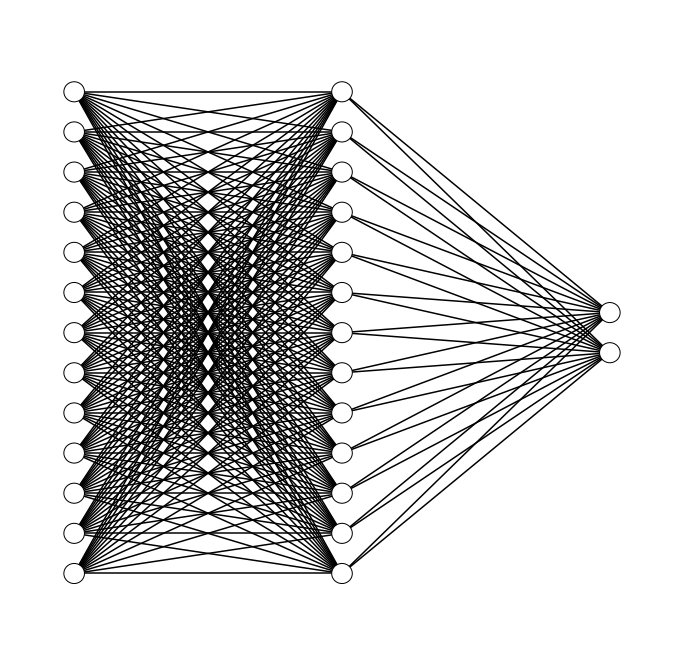

In [24]:
fig = plt.figure(figsize=(12, 12))
ax = fig.gca()
ax.axis('off')
draw_neural_net(ax, .1, .9, .1, .9, [13, 13, 2])

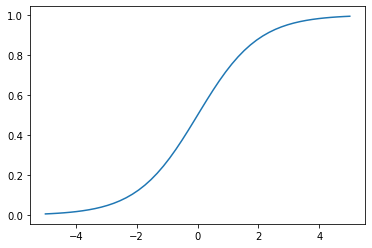

In [25]:
# sigmoid function representation
_x = np.linspace( -5, 5, 50 )
_y = 1 / ( 1 + np.exp( -_x ) )
plt.plot( _x, _y )

In [26]:
learning_rate = 0.2 # slowly update the network
error = []
for epoch in range(1000):
    # activate the first layer using the input
    #   matrix multiplication between the input and the layer 1 weights
    #   result is fed into a sigmoid function
    l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
    # activate the second layer using first layer as input
    l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))
    # find the average errorof this batch
    #   using absolute, can use use square as well
    er = (abs(y - l2)).mean()
    error.append(er)
    
    # BACKPROPAGATION / learning!
    # find contribution of error on each weight on the second layer
    l2_delta = (y - l2)*(l2 * (1-l2))
    # update each weight in the second layer slowly
    w2 += l1.T.dot(l2_delta) * learning_rate
    
    # find contribution of error on each weight on the second layer w.r.t the first layer
    l1_delta = l2_delta.dot(w2.T) * (l1 * (1-l1))
    # udpate weights in the first layer
    w1 += X.T.dot(l1_delta) * learning_rate
    
print('Error:', er)

<ipython-input-26-0d36a0d6e640>:9: RuntimeWarning: overflow encountered in exp
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))


Error: 0.09507851794062543


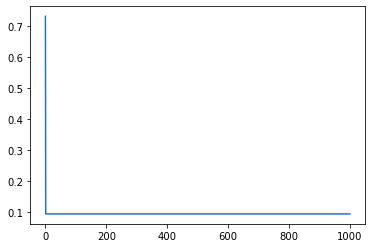

In [27]:
plt.plot(error)

In [28]:
X = test.values[:,:13]
y = np.array([targets[int(x)] for x in test.values[:,13:14]])

l1 = 1/(1 + np.exp(-(np.dot(X, w1))))
l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))

np.round(l2,3)

<ipython-input-28-a192958d48b0>:5: RuntimeWarning: overflow encountered in exp
  l2 = 1/(1 + np.exp(-(np.dot(l1, w2))))


array([[0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.]])

In [29]:
yp = np.argmax(l2, axis=1) # prediction
res = yp == np.argmax(y, axis=1)
correct = np.sum(res)/len(res)

testres = test[['fire_alarm']]

testres['Prediction'] = yp
testres['Prediction'] = testres['Prediction']

print(testres)
print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')

       fire_alarm  Prediction
8               0           1
10              0           1
11              0           1
20              0           1
28              0           1
...           ...         ...
62564           0           1
62577           0           1
62579           0           1
62603           0           1
62623           0           1

[6231 rows x 2 columns]
Correct: 4445 / 6231 : 71.33686406676296 %


<ipython-input-29-9c96e500650e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testres['Prediction'] = yp
<ipython-input-29-9c96e500650e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testres['Prediction'] = testres['Prediction']
